<a href="https://colab.research.google.com/github/EliwaaH/Deep-Learning-Projects/blob/main/Cats%26Dogs_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we will use Kaggel cats and dogs dataset and we will build a classifier using Tensorflow and Keras from scratch.

This is the first part of three parts project which contains


*   **Cats & Dogs classifier from scratch (This notebook)**
*   Cats & Dogs classifier using Feature Extraction method 

*   Cats & Dogs classifier using Fine Tuning method







In [1]:
import numpy as np
import os
import random
import zipfile 
import shutil
import tensorflow as tf 
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/content/catsVdogs.zip"

--2022-09-22 20:17:50--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.117.233.21, 2600:1409:9800:984::317f, 2600:1409:9800:98c::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.117.233.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/content/catsVdogs.zip’

/content/catsVdogs. 100%[===================>] 786.67M   219MB/s    in 3.7s    

2022-09-22 20:17:54 (211 MB/s) - ‘/content/catsVdogs.zip’ saved [824887076/824887076]



In [3]:
# Here, we are zipping our downloaded dataset and extract it in our working directory 

local_zip = "/content/catsVdogs.zip"
zip_file = zipfile.ZipFile(local_zip, 'r')
current_dir = os.getcwd()
zip_file.extractall(current_dir)
zip_file.close()

In [4]:
source_path = '/content/PetImages'

source_path_cats = os.path.join(source_path, 'Cat')
source_path_dogs = os.path.join(source_path, 'Dog')

# Here, we are removing any file that doesn't has the file format jpg in our working files
!find /content/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

print(f'Found {len(os.listdir(source_path_cats))} images of cats')
print(f'Found {len(os.listdir(source_path_dogs))} images of dogs')

Found 12500 images of cats
Found 12500 images of dogs


So, After downloading our data and clean it we have to prepare our training and validation directories to copy cats and dogs images in it

In [10]:
# Training and Validation Directories Preparation

def create_train_valid_dirs():
  
  cur_dir = os.getcwd()

  
  #Checking if the main directory is already exists or not, if exist so delete the whole directroy
  if os.path.exists(os.path.join(f'{cur_dir}/catsVdogs')):
    shutil.rmtree(os.path.join(f'{cur_dir}/catsVdogs'))

  #creating the main directory
  os.mkdir(os.path.join(cur_dir, 'catsVdogs'))


  #creatin the training directory
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs', 'training'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/training', 'cats'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/training', 'dogs'))
  
  #creating the validation directory
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs', 'validation'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/validation', 'cats'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/validation', 'dogs'))

  pass

create_train_valid_dirs()

The next step is splitting our data into validation and training samples, so we will create a function that will do some steps on data before splitting

1.   Randomize our data by shuffling it by using (random.sample(list, len(list))
2.   Check if there's any image that doesn't have a size(undefined image)

1.   Splitting our data by a ratio that we will define





In [11]:
def split_data(source_dir, training_dir, validation_dir, split_size):
  
  shuffled_data = random.sample(list(os.listdir(source_dir)), len(os.listdir(source_dir)))
  training_number = int(len(shuffled_data) * split_size)

  i = 0
  dir = training_dir

  for im in shuffled_data:
    image_source = os.path.join(source_dir, im)

    if i == training_number:
      dir = validation_dir
    
    i += 1

    if os.path.getsize(image_source) == 0:
      print(f'{im} is zero lentgh, so ignoring')

    else:
      copyfile(image_source, os.path.join(dir, im))


  pass

After creating our function we have to define our paths and check the number of images that will fly to our image generators which will be the input for our classifier.

In [12]:
CAT_DIRECTORY = '/content/PetImages/Cat/'
DOG_DIRECTORY = '/content/PetImages/Dog/'

TRAINING_CAT_DIR = '/content/catsVdogs/training/cats/'
TRAINING_DOG_DIR = '/content/catsVdogs/training/dogs/'
VALIDATION_CAT_DIR = '/content/catsVdogs/validation/cats/'
VALIDATION_DOG_DIR = '/content/catsVdogs/validation/dogs/'


if len(os.listdir(TRAINING_CAT_DIR)) > 0:
  for file in os.scandir(TRAINING_CAT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOG_DIR)) > 0:
  for file in os.scandir(TRAINING_DOG_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CAT_DIR)) > 0:
  for file in os.scandir(VALIDATION_CAT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOG_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOG_DIR):
    os.remove(file.path)

split_data(CAT_DIRECTORY, TRAINING_CAT_DIR, VALIDATION_CAT_DIR, 0.9)
split_data(DOG_DIRECTORY, TRAINING_DOG_DIR, VALIDATION_DOG_DIR, 0.9)

print(f"\n\nThere are {len(os.listdir(TRAINING_CAT_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOG_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CAT_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(VALIDATION_DOG_DIR))} images of dogs for testing")


666.jpg is zero lentgh, so ignoring
11702.jpg is zero lentgh, so ignoring


There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


Now, we are in the last part of preparing our data which is making the genrators that will be the classifier input.

Generators are very useful keras image API that can do a lot of operations to our data before going to the classifier like AUGMENTAION.

In [13]:
def create_image_generators(TRAINING_DIR, VALIDATION_DIR):

  train_data = ImageDataGenerator(
      rescale=1./255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      shear_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )

  train_generator=train_data.flow_from_directory(
      directory = TRAINING_DIR,
      batch_size = 128, 
      class_mode='binary',
      target_size = (150, 150)
  )


  valid_data = ImageDataGenerator(rescale=1./255.)

  validation_generator = valid_data.flow_from_directory(
      directory = VALIDATION_DIR, 
      batch_size = 32, 
      class_mode='binary',
      target_size = (150, 150)
  )

  return train_generator, validation_generator

In [14]:
TRAINING_DIR = '/content/catsVdogs/training/'
VALIDATION_DIR = '/content/catsVdogs/validation/'

train_generator, validation_generator = create_image_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


As we can see our Image generators successfuly defined two classes for every directory

Now we are going to create our model and build our DNN from scratch using tensorflow and keras

In [15]:
def create_model():

  inputs = Input(shape=(150, 150, 3))
  x = Conv2D(16, (3, 3), activation='relu')(inputs)
  x = Conv2D(16, (3, 3), activation='relu')(x)
  x = Dropout(0.2)(x)
  x = MaxPooling2D(2, 2)(x)
  x = Conv2D(32, (3, 3), activation='relu')(x)
  x = Conv2D(64, (3, 3), activation='relu')(x)
  x = Dropout(0.2)(x)
  x = MaxPooling2D(2, 2)(x)
  x = Conv2D(64, (3, 3), activation='relu')(x)
  x = Conv2D(128, (3, 3), activation='relu')(x)
  x = Dropout(0.2)(x)
  x = MaxPooling2D(2, 2)(x)

  x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation='sigmoid')(x)

  model = Model(inputs = inputs, outputs =  x)
  
  return model

In [16]:
model  = create_model()

In [17]:
model.compile(optimizer = Adam(learning_rate=0.0001), 
             loss = 'binary_crossentropy', 
             metrics=['accuracy'])

In [18]:
history = model.fit(
    train_generator,
    epochs = 50, 
    verbose = 1,
    validation_data=validation_generator 
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

176/176 [==============================] - 184s 961ms/step - loss: 0.6664 - accuracy: 0.5730 - val_loss: 0.6244 - val_accuracy: 0.6508
Epoch 2/50
176/176 [==============================] - 168s 952ms/step - loss: 0.5975 - accuracy: 0.6739 - val_loss: 0.5858 - val_accuracy: 0.6908
Epoch 3/50
176/176 [==============================] - 166s 940ms/step - loss: 0.5765 - accuracy: 0.6949 - val_loss: 0.5715 - val_accuracy: 0.6912
Epoch 4/50
176/176 [==============================] - 167s 946ms/step - loss: 0.5508 - accuracy: 0.7163 - val_loss: 0.5629 - val_accuracy: 0.7084
Epoch 5/50
176/176 [==============================] - 166s 943ms/step - loss: 0.5340 - accuracy: 0.7310 - val_loss: 0.5292 - val_accuracy: 0.7408
Epoch 6/50
176/176 [==============================] - 167s 948ms/step - loss: 0.5195 - accuracy: 0.7408 - val_loss: 0.5053 - val_accuracy: 0.7604
Epoch 7/50
176/176 [==============================] - 170s 964ms/step - loss: 0.5130 - accuracy: 0.7454 - val_loss: 0.4960 - val_accura

The Last step in our notebook is to visualize the training results so we can see how our training and validation accuracies like, This help us to know at which point our model is getting to overfit and where is the best training point that the model reached to it during training.

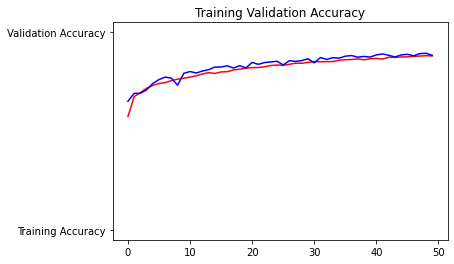

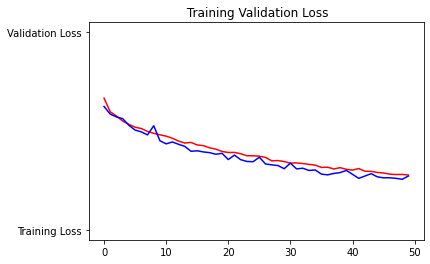

In [20]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(training_accuracy))

plt.plot(epochs, training_accuracy, 'r', "Training Accuracy")
plt.plot(epochs, validation_accuracy, 'b', "Validation Accuracy")
plt.title("Training Validation Accuracy")
plt.show()
print("")


plt.plot(epochs, training_loss, 'r', "Training Loss")
plt.plot(epochs, validation_loss, 'b', "Validation Loss")
plt.title(" Training Validation Loss")
plt.show()